In [75]:
import pyemu
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import geostat_helpers as gh
import pandas as pd

## `pyemu` supports three variogram models

This follows the _GSLIB_ terminology

 1. *Spherical*  
### $\gamma\left(h\right)=c\times\left[1.5\frac{h}{a}-0.5\frac{h}{a}^3\right]$ if $h<a$
### $\gamma\left(h\right)=c$ if $h \ge a$  
     
 2. *Exponential*  
### $\gamma\left(h\right)=c\times\left[1-\exp\left(-\frac{h}{a}\right)\right]$  
     
 3. *Gaussian*  
### $\gamma\left(h\right)=c\times\left[1-\exp\left(-\frac{h^2}{a^2}\right)\right]$  

     

$h$ is the separation distance, and $a$ is the range. `contribution` is the variogram value at which the variogram levels off. Also called the `sill`, this value is the maximum variability between points.

The sill is reached at about $a$ for the *Spherical* model, $2a$ for the *Gaussian*, and $3a$ for the *Exponential*

In [89]:
contribution=100.0
a=350.0
v = pyemu.geostats.GauVario(contribution=contribution,a=a)
gs = pyemu.geostats.GeoStruct(variograms=v)

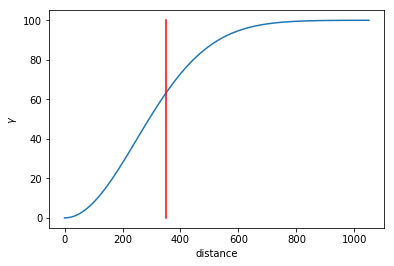

In [90]:
ax = gs.plot()
plt.plot([a,a],[0, contribution], 'r')

# make a quick spatial domain

In [51]:
x = np.linspace(1,1000,50)
y = x.copy()
X,Y = np.meshgrid(x,y)

## also set up a few points at which to sample

In [77]:

npts = 100
xs = np.random.uniform(0,1000, 100)
ys = np.random.uniform(0,1000, 100)
names = ['p{0}'.format(i) for i in range(npts)]
sample_df = pd.DataFrame({'x':xs,'y':ys,'name': names})

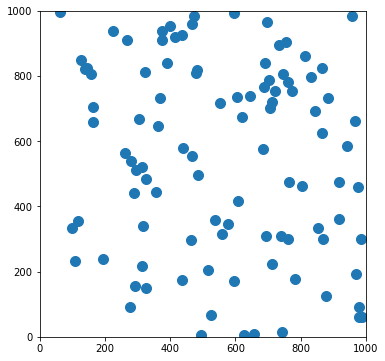

In [53]:
gh.field_scatterplot(xs,ys)


# we can create a covariance matrix from these points and the structure

In [54]:
Q=gs.covariance_matrix(X.ravel(),Y.ravel(),names=[str(i) for i in range(len(Y.ravel()))])

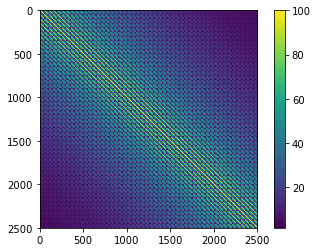

In [55]:
plt.imshow(Q.x)
plt.colorbar()
plt.show()

In [56]:
d = Q.draw(mean=100).reshape(X.shape)

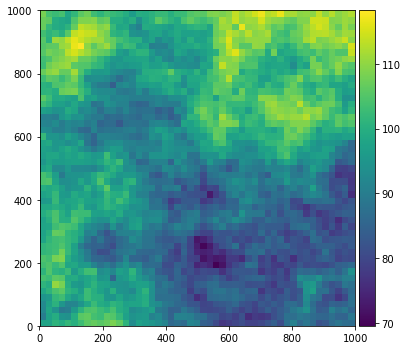

In [57]:
gh.grid_plot(X,Y,d)

In [58]:
zs = gh.sample_from_grid(X,Y,d,xs,ys)

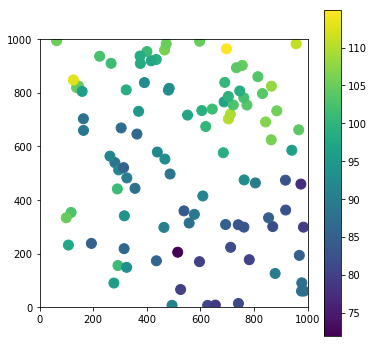

In [59]:
gh.field_scatterplot(xs,ys,zs)

/Users/mnfienen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mnfienen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


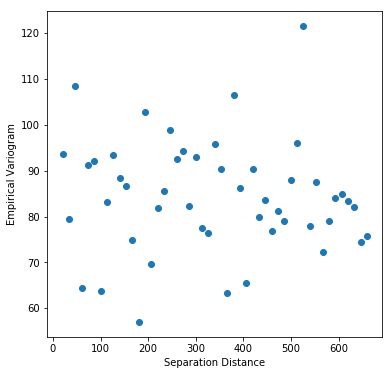

In [95]:
h,gam,ax=gh.plot_empirical_variogram(xs,ys,zs,50)

# Now we can try and fit a variogram to these data

/Users/mnfienen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mnfienen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


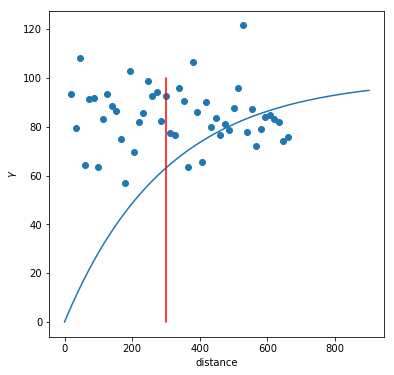

In [94]:
h,gam,ax=gh.plot_empirical_variogram(xs,ys,zs,50)
new_c=100.0
new_a=300.0

v_fit = pyemu.geostats.ExpVario(contribution=new_c,a=new_a)
gs_fit = pyemu.geostats.GeoStruct(variograms=v_fit)
gs_fit.plot(ax=ax)
plt.plot([new_a,new_a],[0, new_c], 'r')

# We can perform Kriging to interpolate using this variogram and our "data"

### First make an Ordinary Kriging object

In [78]:
k = pyemu.geostats.OrdinaryKrige(gs_fit,sample_df)

In [82]:
kfactors = k.calc_factors(X.ravel(),Y.ravel())

starting interp point loop for 2500 points
took 8.826064


In [84]:
k.to_grid_factors_file('k_factors.dat')

Exception: ok.spatial_reference is None, must call calc_factors_grid() first

In [97]:
k.interp_data

,x,y,idist,inames,ifacts,err_var
0,1.000000,1.0,"[214.230430259, 214.804034726, 251.690944285, 291.416864887, 337.845716379, 364.248155458, 395.5...","[p92, p94, p40, p12, p82, p13, p20, p96, p67, p33, p52, p16, p85, p69, p1, p41, p48, p24, p59, p89]","[0.32179162431, 0.199358331183, -0.0375627069118, 0.136744882156, -0.0237992706744, -0.032094531...",50.072969
1,21.387755,1.0,"[194.275595802, 195.237090345, 232.458268317, 276.734997845, 319.056151292, 348.17932683, 376.49...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p67, p52, p16, p69, p85, p1, p41, p24, p48, p59, p89]","[0.341574976866, 0.212349933243, -0.0403866142722, 0.137028140435, -0.0245217553033, -0.03200830...",48.321033
2,41.775510,1.0,"[174.420922241, 175.856733378, 213.440115018, 262.815619856, 300.47503789, 332.584259437, 357.62...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p67, p52, p16, p69, p1, p85, p41, p24, p59, p48, p46]","[0.355752794859, 0.225474321375, -0.0441826553455, 0.134951293872, -0.0233769377289, -0.02950022...",48.253481
3,62.163265,1.0,"[154.704978016, 156.73219522, 194.699357999, 249.786232936, 282.143563153, 317.532764821, 338.93...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p67, p16, p52, p1, p69, p85, p41, p24, p59, p46, p48]","[0.383852571095, 0.237742484497, -0.0472379152012, 0.130507279524, -0.0234799275609, -0.02889346...",45.677215
4,82.551020,1.0,"[135.188473794, 137.969897003, 176.324469169, 237.793177792, 264.113712591, 303.105831288, 320.4...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p67, p16, p1, p69, p52, p85, p24, p41, p46, p59, p48]","[0.417656592682, 0.247996249112, -0.0504185746986, 0.122724136646, -0.0229972817799, -0.02783428...",42.649311
5,102.938776,1.0,"[115.972142287, 119.740239918, 158.442790831, 227.000770398, 246.451693532, 289.396880258, 302.2...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p67, p16, p1, p69, p52, p24, p85, p41, p46, p59, p21]","[0.461823689943, 0.25457209879, -0.0533093154752, 0.111217206157, -0.0207558901595, -0.026717234...",38.224526
6,123.326531,1.0,"[97.2341156324, 102.328289092, 141.241773641, 217.58774146, 229.242540614, 276.512720794, 284.25...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p67, p1, p16, p69, p24, p46, p52, p41, p85, p59, p21]","[0.513739732917, 0.252077000258, -0.0560799578063, 0.094955941049, -0.0184715670971, -0.02452456...",34.266227
7,143.714286,1.0,"[79.3141211585, 86.2308155907, 125.002721539, 209.739890871, 212.596257554, 264.573876896, 266.6...","[p92, p94, p40, p12, p82, p13, p20, p96, p33, p1, p16, p67, p24, p69, p46, p41, p52, p85, p59, p21]","[0.580493617257, 0.234254299274, -0.0570594394667, 0.0741894544583, -0.0145926762251, -0.0218506...",29.839602
8,164.102041,1.0,"[62.9150816871, 72.3308335543, 110.151910013, 196.655831698, 203.638256543, 249.476452384, 253.7...","[p92, p94, p40, p82, p12, p20, p13, p96, p33, p1, p16, p67, p46, p24, p69, p41, p21, p52, p85, p59]","[0.665851655398, 0.190504145041, -0.0526557903278, -0.00836814442812, 0.0497367908703, 0.0036264...",25.179608
9,184.489796,1.0,"[49.570215941, 62.1213854005, 97.3269093461, 181.607226375, 199.443170726, 232.819888229, 239.25...","[p92, p94, p40, p82, p12, p20, p96, p13, p33, p1, p46, p16, p24, p67, p69, p21, p41, p59, p85, p52]","[0.76435970206, 0.111789135287, -0.0346944017245, 0.00146595338648, 0.0237365912994, 0.006632376...",20.965465
